<a href="https://colab.research.google.com/github/bob8dod/NLP_SelfStudying/blob/main/RNN(Simple%2C%20Bidirectional).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 순환 신경망 (RNN, Recurrent Neural Network)

### Keras Sequential API 로 구현

In [ ]:
from keras.models import Sequential
from keras.layers import SimpleRNN

In [ ]:
hidden_size = 3
timesteps = 2
input_dim = 10
model = Sequential()
model.add(SimpleRNN(hidden_size, input_shape=(timesteps,input_dim)))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력값이 (batch_size, output_dim) 크기의 2D 텐서일 때, output_dim은 hidden_size의 값인 3.  
그래서 batch_size를 현 단계에서는 알 수 없으므로 (None, 3)


In [ ]:
hidden_size = 3
timesteps = 2
input_dim = 10
batch_size = 8 #batch_size설정
model = Sequential()
model.add(SimpleRNN(hidden_size, batch_input_shape=(batch_size,timesteps,input_dim)))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (8, 3)                    42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


batch_size를 8로 기재하자, 출력의 크기가 (8, 3)

In [ ]:
hidden_size = 3
timesteps = 2
input_dim = 10
batch_size = 8 #batch_size설정
model = Sequential()
model.add(SimpleRNN(hidden_size, batch_input_shape=(batch_size,timesteps,input_dim), return_sequences=True))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (8, 2, 3)                 42        
Total params: 42
Trainable params: 42
Non-trainable params: 0
_________________________________________________________________


출력의 크기가 (8, 2, 3)이 됨

### 파이썬으로 직접 구현


의사 코드
```
hidden_state_t = 0 # 초기 은닉 상태를 0(벡터)로 초기화
for input_t in input_length: # 각 시점마다 입력을 받는다.
    output_t = tanh(input_t, hidden_state_t) # 각 시점에 대해서 입력과 은닉 상태를 가지고 연산
    hidden_state_t = output_t # 계산 결과는 현재 시점의 은닉 상태가 된다.
```



In [ ]:
import numpy as np

#초기 입력, 타임스탭, 히든스테이트 값 설정

timesteps = 10 # 시점의 수. NLP에서는 보통 문장의 길이가 된다.
input_dim = 4 # 입력의 차원. NLP에서는 보통 단어 벡터의 차원이 된다.
hidden_size = 8 # 은닉 상태의 크기. 메모리 셀의 용량이다.

inputs = np.random.random((timesteps, input_dim)) # 입력에 해당되는 2D 텐서

hidden_state_t = np.zeros((hidden_size,)) # 초기 은닉 상태는 0(벡터)로 초기화
# 은닉 상태의 크기 hidden_size로 은닉 상태를 만듬.

In [ ]:
print(hidden_state_t) # 초기 은닉 상태

[0. 0. 0. 0. 0. 0. 0. 0.]


In [ ]:
#입력, 히든 가중치 설정
Wx = np.random.random((hidden_size, input_dim))  # (8, 4)크기의 2D 텐서 생성. 입력에 대한 가중치.
Wh = np.random.random((hidden_size, hidden_size)) # (8, 8)크기의 2D 텐서 생성. 은닉 상태에 대한 가중치.
b = np.random.random((hidden_size,)) # (8,)크기의 1D 텐서 생성. 이 값은 편향(bias).

In [ ]:
#가중치와 편향의 크기 확인
print(np.shape(Wx))
print(np.shape(Wh))
print(np.shape(b))

(8, 4)
(8, 8)
(8,)


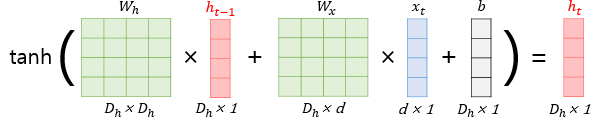

In [ ]:
total_hidden_states = []

# 메모리 셀 동작
for input_t in inputs: # 각 시점에 따라서 입력값이 입력됨.
  output_t = np.tanh(np.dot(Wx,input_t) + np.dot(Wh,hidden_state_t) + b) # Wx * Xt + Wh * Ht-1 + b(bias)
  total_hidden_states.append(list(output_t)) # 각 시점의 은닉 상태의 값을 계속해서 축적
  print(np.shape(total_hidden_states)) # 각 시점 t별 메모리 셀의 출력의 크기는 (timestep, output_dim)
  hidden_state_t = output_t

total_hidden_states = np.stack(total_hidden_states, axis = 0) 
# 출력 시 값을 깔끔하게 해준다.

print(total_hidden_states) # (timesteps, output_dim)의 크기. 이 경우 (10, 8)의 크기를 가지는 메모리 셀의 2D 텐서를 출력.

(1, 8)
(2, 8)
(3, 8)
(4, 8)
(5, 8)
(6, 8)
(7, 8)
(8, 8)
(9, 8)
(10, 8)
[[0.22364814 0.88316435 0.90339992 0.55720634 0.89722888 0.67427525
  0.77323787 0.84802971]
 [0.9988804  0.99985694 0.99999351 0.9996528  0.99942303 0.99796056
  0.99945957 0.99993893]
 [0.99991582 0.9999759  0.99999825 0.99995125 0.99997152 0.99865176
  0.99992751 0.99996084]
 [0.99991873 0.99997448 0.99999864 0.99995492 0.99996269 0.99878048
  0.99991201 0.99996878]
 [0.99989231 0.9999761  0.9999985  0.99989326 0.99994168 0.99848315
  0.99985291 0.99997844]
 [0.99992533 0.99998841 0.99999956 0.99994364 0.99995507 0.99934405
  0.99990132 0.99999005]
 [0.99996511 0.99999291 0.99999968 0.99998116 0.99998536 0.99959401
  0.99996263 0.99998803]
 [0.99989577 0.99998112 0.99999913 0.9998975  0.99993095 0.99886913
  0.99984102 0.99998646]
 [0.99986399 0.99993774 0.99999859 0.99987154 0.99973973 0.99797586
  0.99949772 0.99998383]
 [0.99994056 0.99995029 0.99999858 0.99995061 0.99989752 0.9983925
  0.99974939 0.99997851]]

## 깊은 순환 신경망(Deep Recurrent Neural Network)

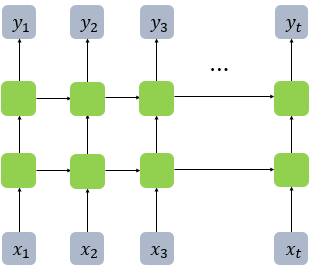

순환 신경망에서 은닉층이 1개 더 추가되어 은닉층이 2개인 깊은(deep) 순환 신경망의 모습

In [ ]:
model = Sequential()
model.add(SimpleRNN(hidden_size, return_sequences = True))
model.add(SimpleRNN(hidden_size, return_sequences = True))
# return_sequences = True를 설정하여 모든 시점에 대해서 은닉 상태 값을 다음 은닉층으로 보내줌

## 양방향 순환 신경망(Bidirectional Recurrent Neural Network)

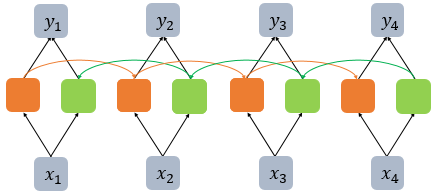

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional

model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))

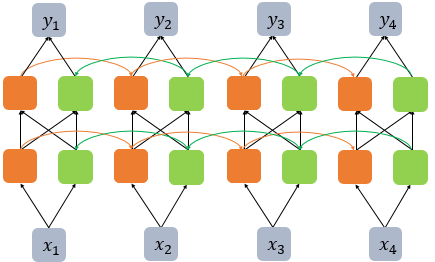

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Bidirectional
model = Sequential()
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True), input_shape=(timesteps, input_dim)))
model.add(Bidirectional(SimpleRNN(hidden_size, return_sequences = True)))

In [ ]:
from tensorflow.keras.layers import Dense
hidden_size = 128
timesteps = 30
input_dim = 100
model = Sequential()
model.add(SimpleRNN(hidden_size, input_shape=(timesteps,input_dim)))
model.add(Dense(1, activation='sigmoid'))
# model.add(SimpleRNN(3, input_length=2, input_dim=10))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 128)               29312     
_________________________________________________________________
dense (Dense)                (None, 1)                 129       
Total params: 29,441
Trainable params: 29,441
Non-trainable params: 0
_________________________________________________________________
